<a href="https://colab.research.google.com/github/vidishaagrawal/AI-Powered-AD-Campaign-Performance-Tracker-/blob/main/AI_Powered_AD_Campaign_Performance_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_id= "1Akhou-710_63Q_DTWqjPXr5Ej7zl_65l"
url=f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)

print(df.columns)


Index(['ad_id', 'reporting_start', 'reporting_end', 'campaign_id',
       'fb_campaign_id', 'age', 'gender', 'interest1', 'interest2',
       'interest3', 'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')


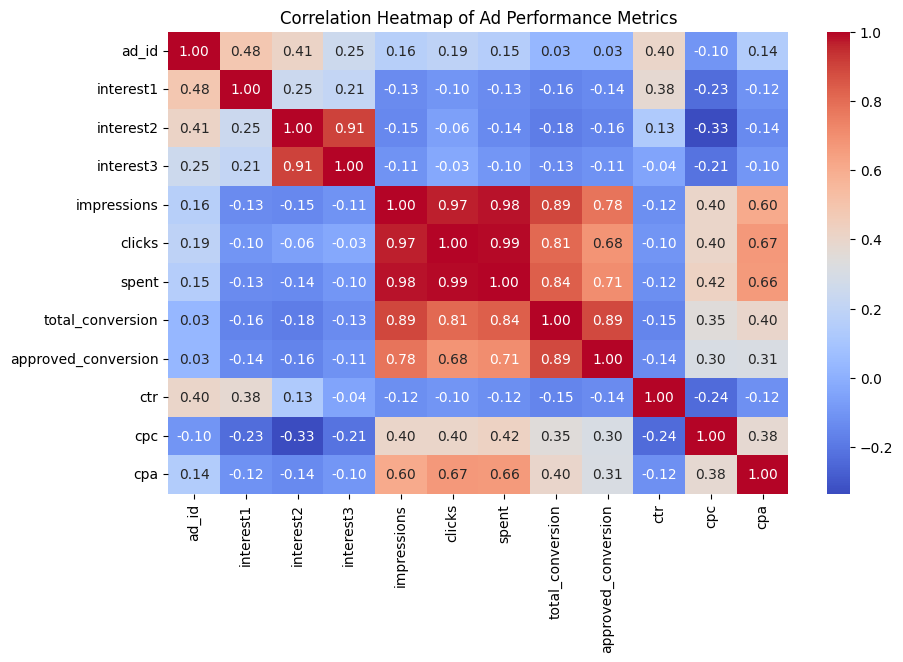

In [8]:
df.columns = df.columns.str.lower()

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Feature Engineering: Create new useful metrics
df["ctr"] = np.where(df["impressions"] > 0, df["clicks"] / df["impressions"], 0)  # Click-Through Rate
df["cpc"] = np.where(df["clicks"] > 0, df["spent"] / df["clicks"], 0)  # Cost Per Click
df["cpa"] = np.where(df["approved_conversion"] > 0, df["spent"] / df["approved_conversion"], 0)  # Cost Per Acquisition

# Drop non-numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])

# Visualize correlation
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Ad Performance Metrics")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

df["age"] = pd.to_numeric(df["age"], errors="coerce")  # Convert age to numeric
df["interest1"] = pd.to_numeric(df["interest1"], errors="coerce")
df["interest2"] = pd.to_numeric(df["interest2"], errors="coerce")
X = df[["spent", "impressions", "approved_conversion", "age", "interest1", "interest2"]]

y = df["ctr"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

MAE: 0.0121, MSE: 0.0029, RMSE: 0.0537
